# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.119551e+01     6.370957e+00
 * time: 0.0046079158782958984
     1     2.893876e+01     4.245472e+00
 * time: 0.01355600357055664
     2     2.212205e+01     5.951066e+00
 * time: 0.03554892539978027
     3     1.368399e+01     2.025472e+00
 * time: 0.0613560676574707
     4     1.323909e+01     4.358103e+00
 * time: 0.07860493659973145
     5     1.286372e+01     2.132573e+00
 * time: 0.09592008590698242
     6     1.129085e+01     3.331603e+00
 * time: 0.11349892616271973
     7     1.067325e+01     2.824297e+00
 * time: 0.13088488578796387
     8     9.870386e+00     1.760993e+00
 * time: 0.14832496643066406
     9     9.205934e+00     9.056953e-01
 * time: 0.16593003273010254
    10     8.977861e+00     7.245231e-01
 * time: 0.1840660572052002
    11     8.852843e+00     6.734284e-01
 * time: 0.20234990119934082
    12     8.741784e+00     7.442487e-01
 * time: 0.21585392951965332
    13     8.669658e+00     4.554823e-01
 * time:

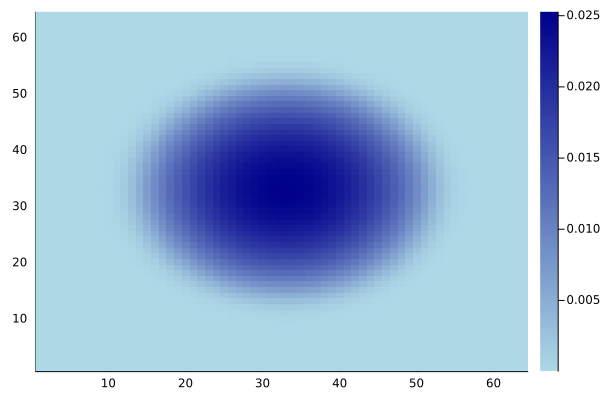

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)